# Automatic Construction of Inlining Heuristics using Machine Learning

💦💦🌊🌊💧🐳🌊🐟🌊💦💦🐳💧

## Abstract

*Features often correspond to the caller method and the callee methods*
-  calling context of the method
-  the target platform

*We use a machine learning technique, amely neuro-evolution [18], to automatically induce effec- tive inlining heuristics from a set of features deemed to be useful for inlining.*

*Careless use of method inlining however can increase register pressure and can dramatically increase the memory footprint of a program.*

*In addition, it can make the compiler perform extra work with little or no beneﬁt, which also impacts a program’s execution time in a dynamic compilation scenario.*

*A good solution to any inlining decision also requires considering the effect of previous inlining decisions. Also, if a callee method is called at two different locations in the caller method, each callee should be considered as a distinct decision point*

## Introduction

In the case of method inlining, a decision point would comprise a single method call consisting of a caller and a callee pair.

In method inlining, each decision can affect sub- sequent decisions, thus making it difﬁcult to study the effect of a single method inlining decision independent of the other decisions. Therefore, it is more appropriate to use unsupervised learning in this situation. In unsupervised learning, we generate solutions to the problem and use this solution to measure its effectiveness

In this paper, we use an unsupervised learning method called Neuro-Evolution of Augmenting Topologies (NEAT) to construct an effective heuristic to perform inlining. 

We thus use our NEAT heuristic to construct a labelled data set which we then use to construct a more readable heuristic using decision trees.

## Motivation

### Sensitivity of Heuristic Metrics

*The callee size is the length of the callee method’s bytecode array.*

For example, if there are only two metrics to consider, inline depth and the maximum size of the callee, then increasing the inline depth would require the compiler writer to reduce the maximum allowed size of the callee method in order to avoid code bloat.

### Search Space

One such solution involves using Neuro-Evolution of Augmenting Topologies (NEAT). In this method, we generate a random set of neural networks for an initial generation, each of which can be used as a method inlining heuristic. Performance of each neural network is measured on a set of programs called the training set, and the best performing neural network is allowed to propagate to the next generation. This process of natural selection picks the best neural network to generate over other neural networks. Eventually over a span of multiple generations we get a heuristic that can be used as a solution not just for the program NEAT trained on, but any other program that it has not seen before.

### Problem and Approach

The neural network is given inputs that characterizes an inlining decision point involving a particular caller and a callee method, and the output of the network corresponds to whether the callee should be inlined to the caller.

For the problem of inlining, it is difﬁcult to construct a labelled training set because knowing the correct output for a inlining decision point cannot be determined in isolation.

It is important to note that training and tuning a heuristic with machine learning happens off-line.

### Default Inlining Heuristic

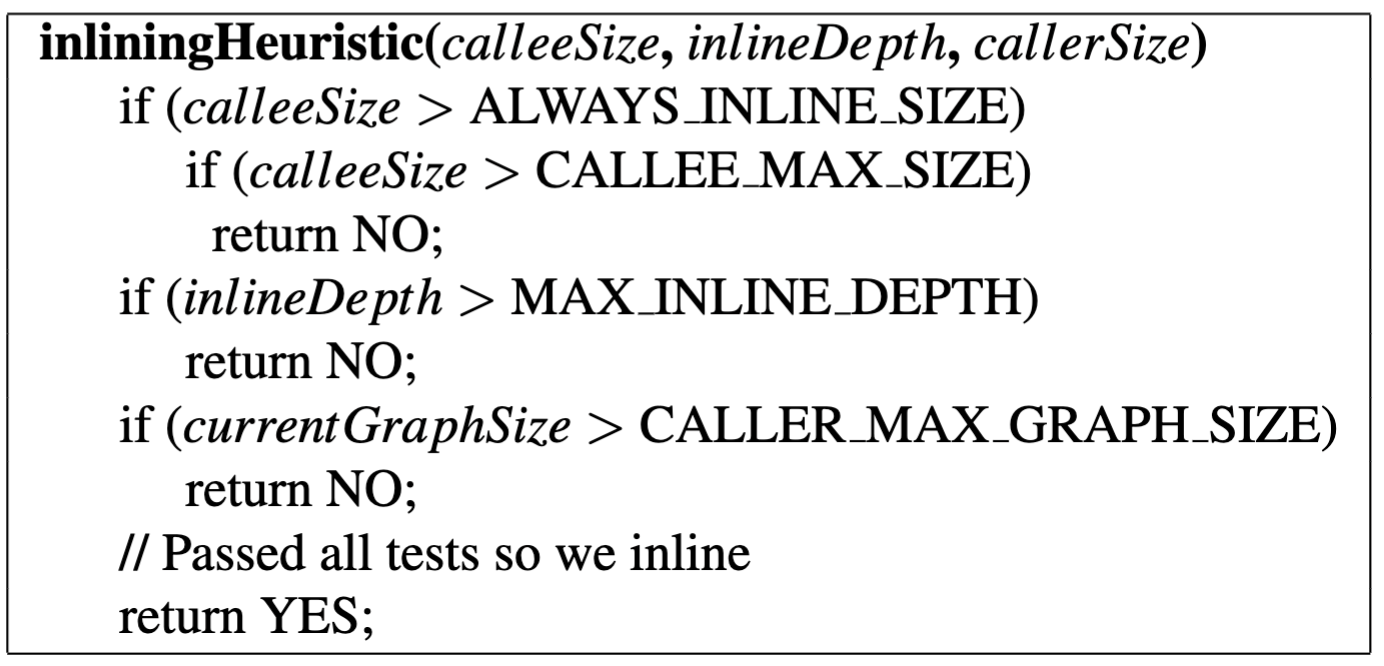

*including the increased nodes added from previous inlining performed*

### Program Characterization

#### Static Source Features

Static source features are the features that are collected from the caller and the callee directly. This is done by categorizing each instruction in a method, and then counting the relative concentration of each of these instruction categories. These instruction categories are shown in Table 1.

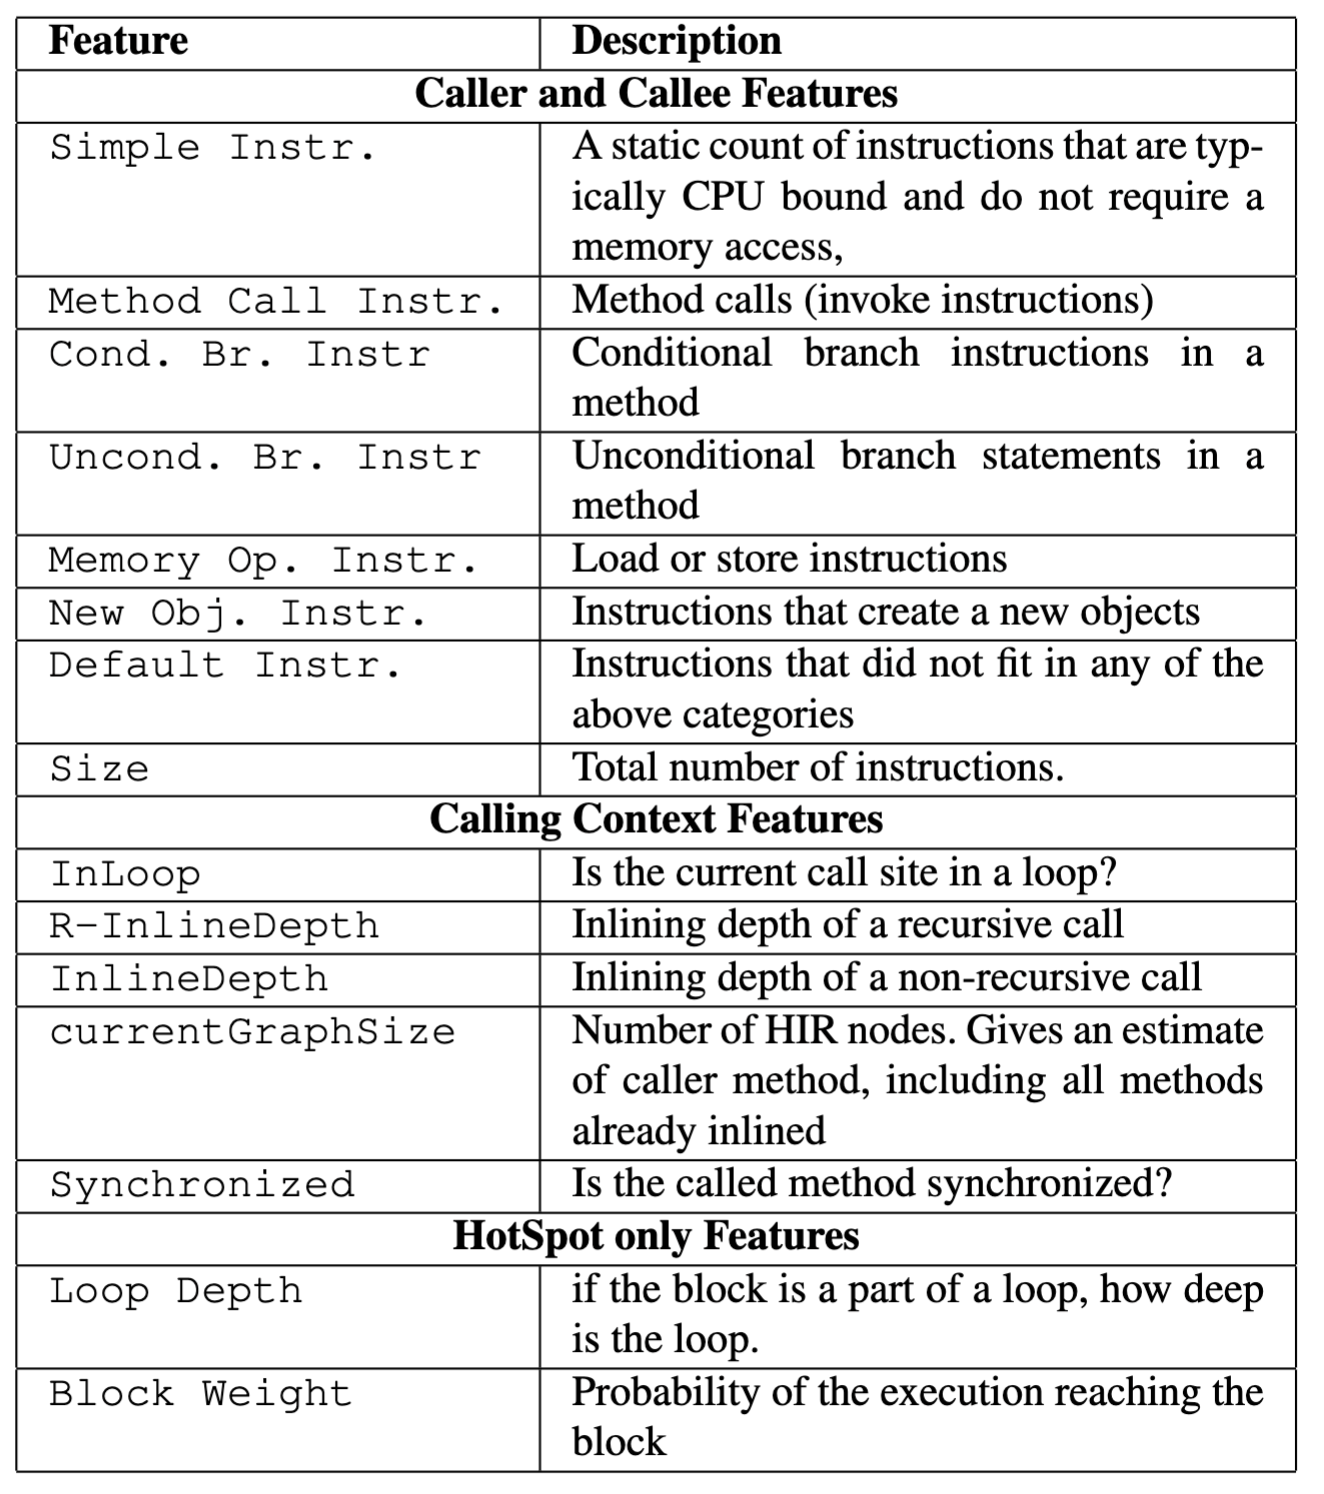

#### Information based on the call context

This is the collection of information that is dependent on the particular call location, for example the current inlining depth, current graph size (this is the measure of the size of the code including the size of the past inlined calls.), whether the call is in a loop, or what is the relative probability of a particular block being executed. The last two factors are collected in the server compiler.

Table 1. The above are source feature categories collected from an inlining decision point. We collect features corresponding to the instructions for the caller and callee methods. We normalize these different instruction counts by total number of instructions and then use the caller and callee features as two different feature sets. We also show calling context features collected from the call site.

### Applying NEAT

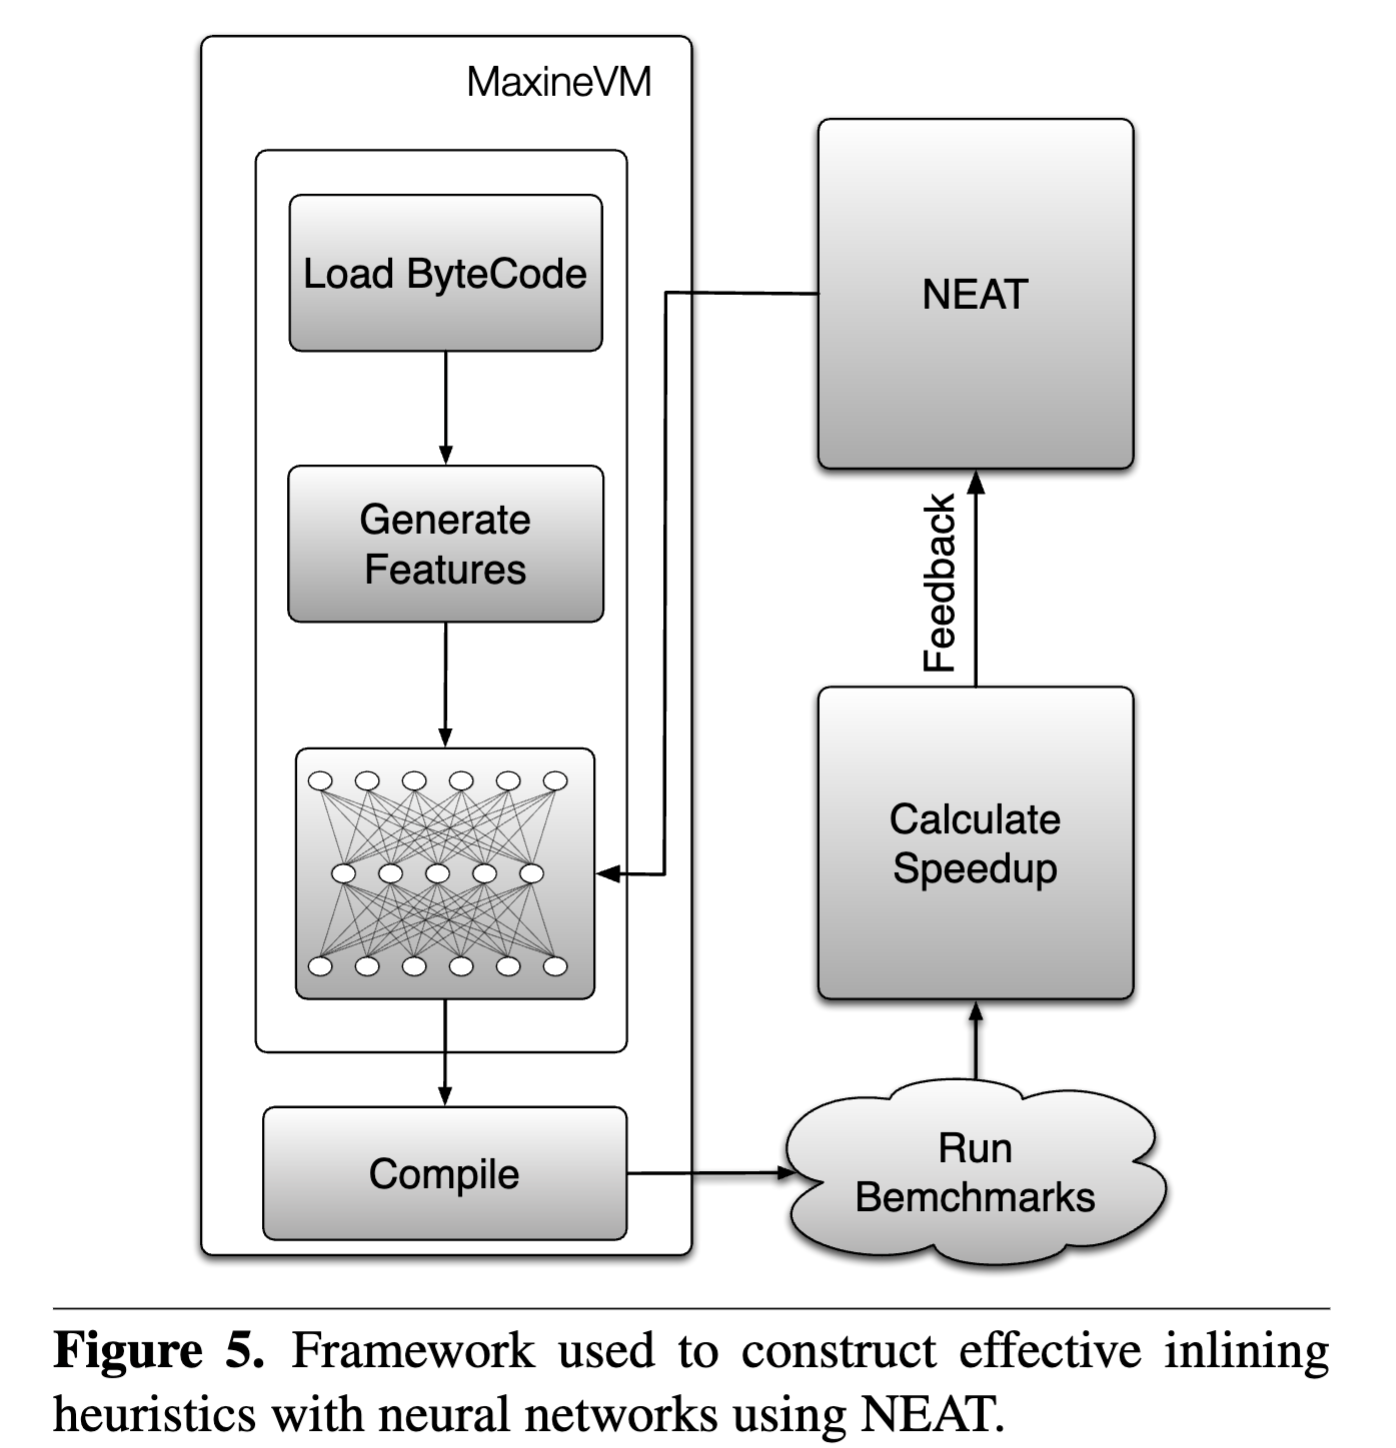

Figure 5. depicts the process of constructing a neural network using NEAT to replace the inlining heuristic in the Maxine VM.

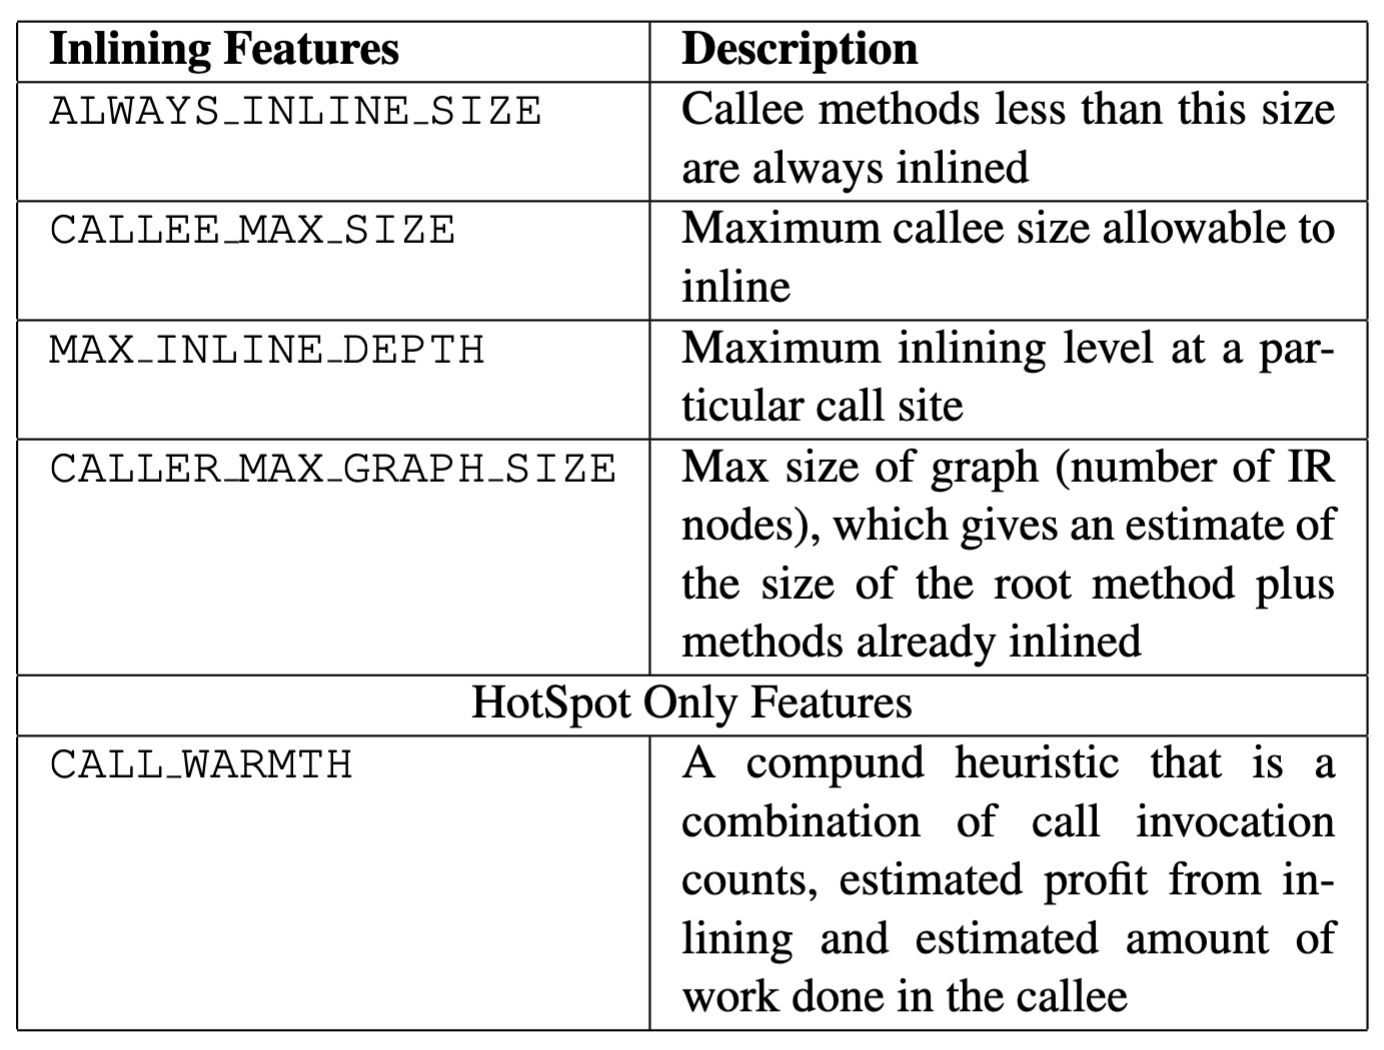

### Generating a Decision Tree

#### Complications in generating dataset.

#### Using NEAT networks to Construct Decision Tree Training Data

### Tuning the Maxine VM with Genetic Algorithms

For the problem of tuning an inlining heuristic, each individual consists of to a set of values to be used as thresholds in the heuristic as shown in Figure 3. For example, [10,30,5,100] correspond to ALWAYS INLINE SIZE = 10, CALLEE MAX SIZE = 30, MAX INLINE DEPTH = 5 and CALLER MAX SIZE = 100

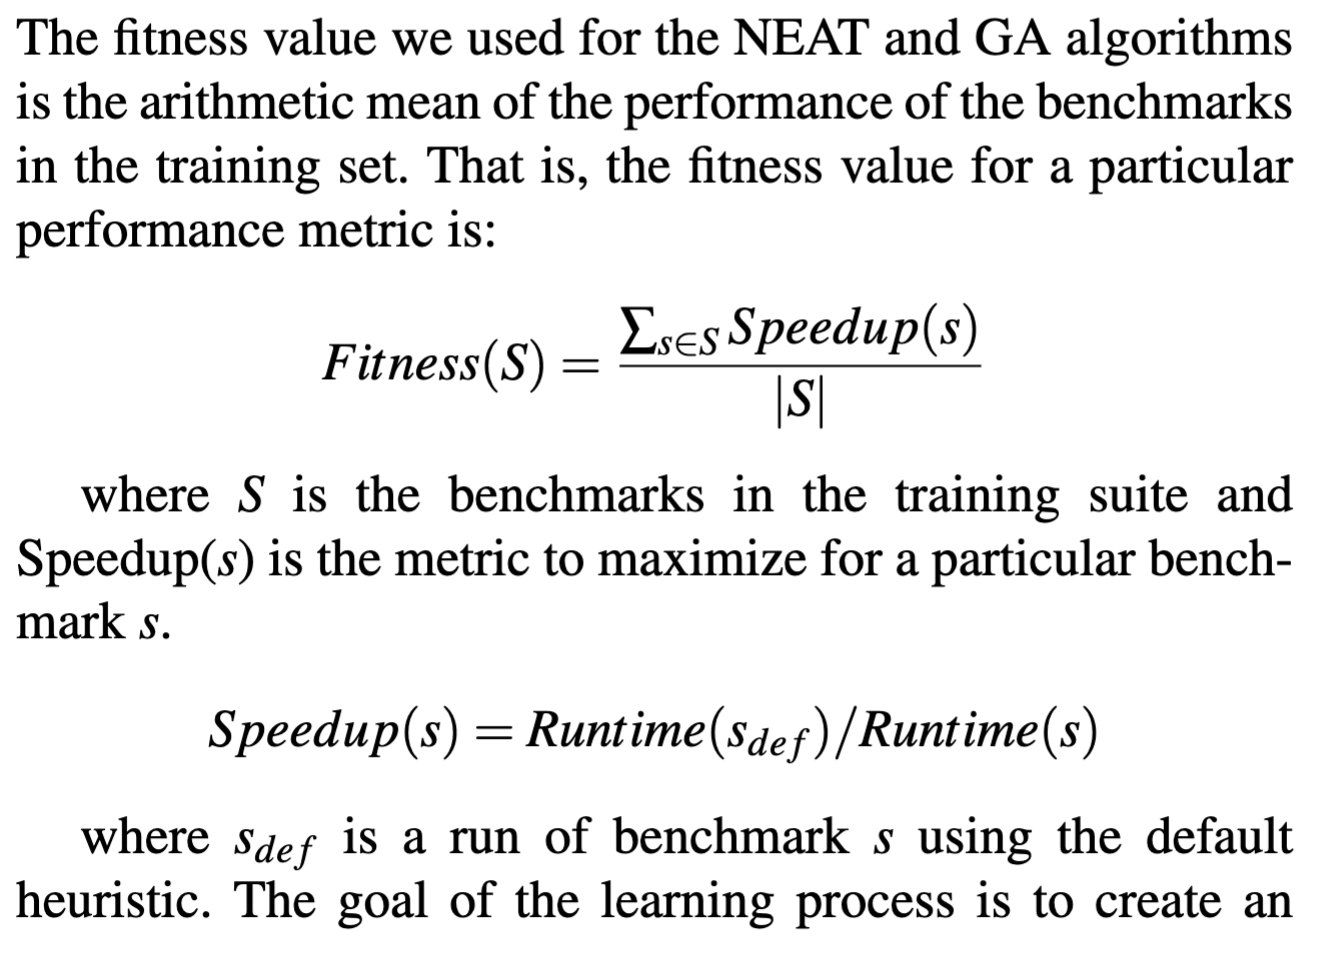

### Experimental Setup And Methodology

#### Evaluation Methodology

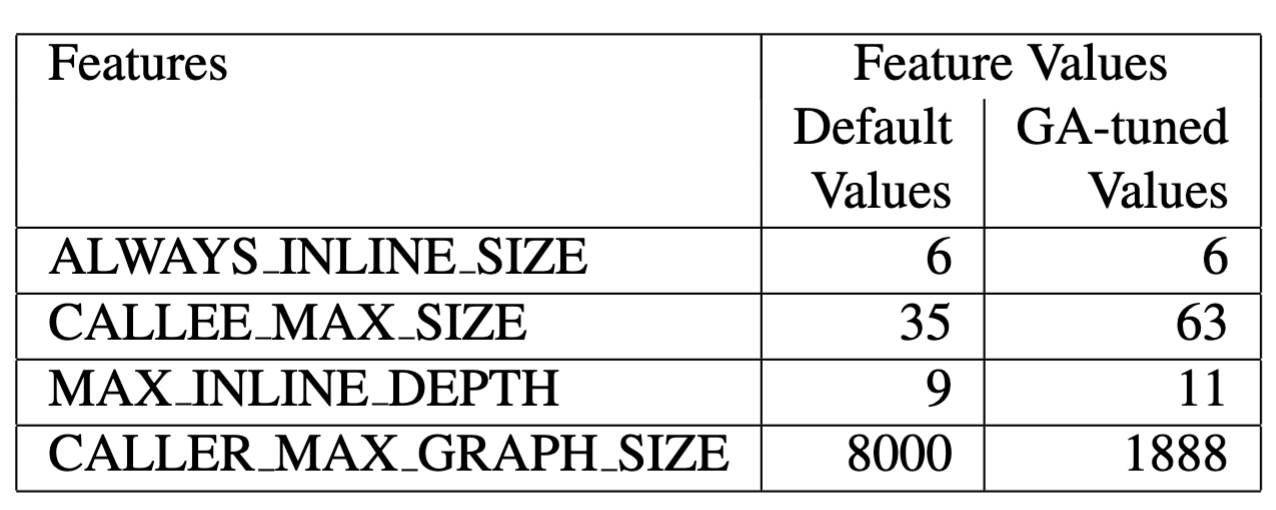

This table shows the default threshold values for the four inlining heuristic features and the tuned values found using genetic algorithms.

notes:

Phase-ordering problem: if two or more analyses are mutually beneficial, then any ordering of the analyses in which each is run only once may yield sub-optimal results. Some common responses to the phase-ordering problem: Carefully choose the order; allow the same analysis to be performed multiple times if needed

https://iitd.github.io/col728/lec/phase_ordering_problem.html

### Experimental Results

On average, the best NEAT neural network improved over the default inlining heuristic in Maxine by 11%

#### Constructing Inlining Heuristics using Decision Trees

We also experimented with different types of features. For the ﬁrst set of experiments we used the same set of features that were being used by the default inliner. For the second set of experiments we added static source code features, and for the ﬁnal set of experiments we added a proﬁling-based feature, which we call the “Block Weight”. 

#### Benchmarks

#### Insights from Decision Tree

*The most important feature was the block weight.*

An interesting situation that we ﬁnd is that if the method is nearing a threshold of not being inlined due to its size, the decision tree checks to see if there are a lot of memory operations. If there are a lot of memory operations, it still inlines the call perhaps assuming that inlining would help in improving instruction scheduling. Another source feature that seems to be fairly important is the number of other method calls in the method. This would predictably seem to adjust the importance of the present inlining decision.

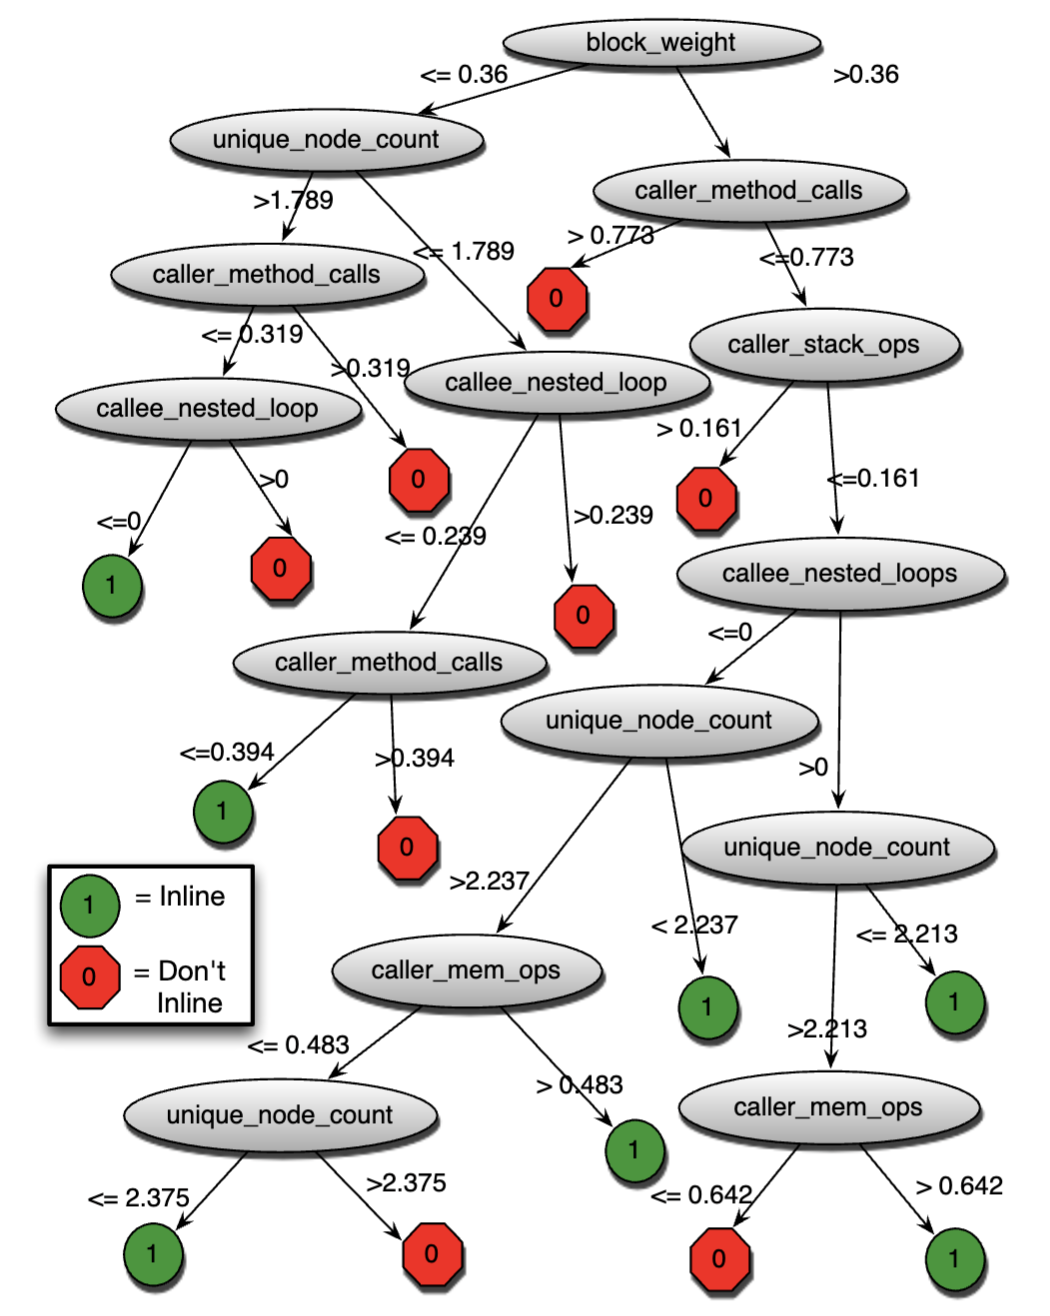

## Related Work

### Method Inlining

In this section we review the most relevant work related to the inlining and machine learning.

**Method Inlining Cooper et al.** [6] The authors discretized the search space in order to reduce searching time. They also suggest a way to make inlining adaptive for a given piece of code. However, the technique requires performing their search on every new program being compiled. In contrast, we are generating fast heuristics that can improve the inliner and do not require search.

**Arnold et al.** [1] represents the inlining problem as a knapsack problem that calculates the size/speed tradeoffs to make inlining decisions. They use code size and the running time as a measure of the effectiveness of the proposed solution. 

This paper however does not talk about inlining enabling other compiler optimizations or the effects of each inlining decision with subsequent inlining decisions.

**Hazelwood et al.** [10] describe a technique of using context sensitive information at each call site to control inlining
decisions. This information included the sequence of calling methods that lead to the current call site. Using this context sensitive information they were able to reduce the code space by 10%, however this resulted in increase in the running time of the benchmarks.

**Dean et al.** [8] develop a technique to measure the effect of inlining decisions for the programming language SELF, called inlining trials, as opposed to predicting them with heuristics.

Inlining trials are used to calculate the costs and beneﬁts of inlining decisions by examining both the effects of optimizations applied to the body of the inlined routine by comparing the present code and environment with past experiences. The results of inlining trials are stored in a persistent database to be reused when making future inlining decisions at similar call sites. Using this technique, the authors were able to reduce compilation time at the expense of an average increase in running time.

**Leupers et al.** [11] They use a search technique called branch-and-bound to explore the space of functions that could be inlined. They experiment with obtaining the best running time possible through inlining while maintaining code bloat under a particular limit. 

### Machine learning

**Stephenson et al.** [19] used genetic
programming (GP) to tune heuristic priority functions for three compiler optimizations: hyperblock selection, register allocation, and data prefetching within the Trimaran’s IMPACT compiler. Genetic programming is a branch of genetic algorithms that evolves a population of parse trees

**Cooper et al.** [7] use genetic algorithms to solve the compilation phase ordering problem. They were concerned with ﬁnding “good” compiler optimization sequences that reduced code size.

**Cavazos et al.** [4] describe an idea of using supervised learning to control whether or not to apply instruction scheduling.

**Monsifrot et al.** [13] worked on trying to predict the beneﬁts of unrolling using a classiﬁcation decision tree. They worked with Fortran programs on two different architectures, and noticed an improvement of around 3%.

## Conclusion
...